In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

# Step 1 - Load the Data

In [2]:
flights = pd.read_csv('flights_train.csv', index_col=0, parse_dates=True)
flights.head()

,passengers
date,
1949-01-01,64
1949-02-01,75
1949-03-01,98
1949-04-01,93
1949-05-01,80


In [3]:
# Inspect the size of the data
flights.shape # 11 years of monthly data

(132, 1)

In [4]:
# Inspect the column types
flights['passengers'].dtype

dtype('int64')

In [5]:
# Inspect for missing values
flights.isna().sum()

passengers    0
dtype: int64

# Step 2 - Plot the data

In [6]:
def plot_flights(df, title='Monthly Passenger Numbers in 1000 over Time', ylim=True):
    '''
    Custom plotting function for plotting the flights dataset
    
    Parameters
    ----------
    df : pd.DataFrame
        The data to plot.
    title : str
        The title of the plot
    ylim : bool
        Whether to fix the minimum value of y; defalut is True
    
    Returns
    -------
    Plots the data
    '''
    df.plot()
    plt.title(title)
    plt.ylabel('# of Passengers in 1000')
    if ylim:
        plt.ylim(ymin=0)
    plt.show()

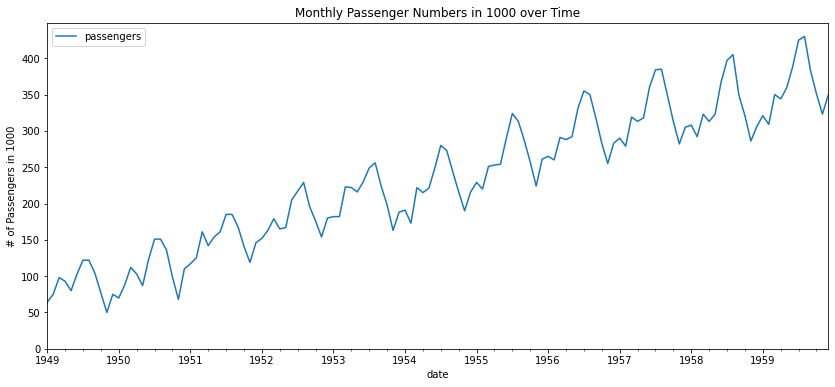

In [7]:
plot_flights(flights)

# Step 3 - Model the trend

Any ideas on how to do that?

- Linear Regression to model the slop; what should/could our X of the Linear Regression be in that case?

In [8]:
# Create a yearly column for the trend
flights['year'] = flights.index.year
flights.head()

,passengers,year
date,,
1949-01-01,64,1949
1949-02-01,75,1949
1949-03-01,98,1949
1949-04-01,93,1949
1949-05-01,80,1949


In [9]:
# Create a monthly column for the trend
flights['month'] = flights.index.month
flights.head()

,passengers,year,month
date,,,
1949-01-01,64,1949,1
1949-02-01,75,1949,2
1949-03-01,98,1949,3
1949-04-01,93,1949,4
1949-05-01,80,1949,5


In [10]:
# list(range(len(flights)))

In [11]:
# (flights.index[4] - flights.index[0]).days

In [12]:
# Create a timestep variable
flights['timestep'] = list(range(len(flights)))
flights.head()

,passengers,year,month,timestep
date,,,,
1949-01-01,64,1949,1,0
1949-02-01,75,1949,2,1
1949-03-01,98,1949,3,2
1949-04-01,93,1949,4,3
1949-05-01,80,1949,5,4


In [13]:
# Run a Linear Regression
m = LinearRegression()
# X = flights[['year']] # Gave us a stepwise function; not exactly what we wanted
# X = flights[['month']] # Gave us a stepwise function without any obvious trend over time
X = flights[['timestep']]
y = flights['passengers']
m.fit(X, y)

LinearRegression()

# Step 4 - Plot the trend and the original data

In [14]:
# Use the model to make a prediction
flights['trend'] = m.predict(X)
flights.head()

,passengers,year,month,timestep,trend
date,,,,,
1949-01-01,64,1949,1,0,79.444293
1949-02-01,75,1949,2,1,81.761937
1949-03-01,98,1949,3,2,84.079581
1949-04-01,93,1949,4,3,86.397226
1949-05-01,80,1949,5,4,88.714870


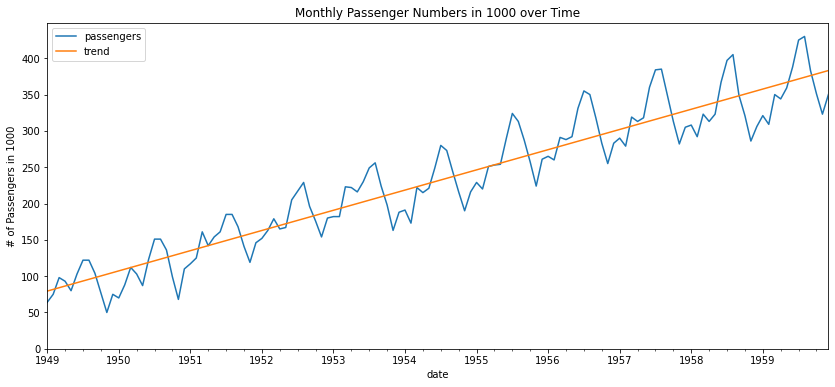

In [15]:
plot_flights(flights[['passengers', 'trend']])

# Step 5 - Model the seasonality

In [16]:
pd.get_dummies(flights.index.month, prefix='month').set_index(flights.index)

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,
1949-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,0,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,0,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,0,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1959-08-01,0,0,0,0,0,0,0,1,0,0,0,0
1959-09-01,0,0,0,0,0,0,0,0,1,0,0,0
1959-10-01,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
# One-Hot-Encoding the month
seasonal_dummies = pd.get_dummies(flights.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(flights.index)
# sklearn.preprocessing.OneHotEncoder

flights = flights.join(seasonal_dummies)

In [18]:
flights.head()

,passengers,year,month,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,
1949-01-01,64,1949,1,0,79.444293,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,75,1949,2,1,81.761937,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,98,1949,3,2,84.079581,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,93,1949,4,3,86.397226,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,80,1949,5,4,88.714870,0,0,0,1,0,0,0,0,0,0,0


In [19]:
# Define X and y
X = flights.drop(columns=['passengers', 'year', 'month', 'trend'])

In [20]:
y

date
1949-01-01     64
1949-02-01     75
1949-03-01     98
1949-04-01     93
1949-05-01     80
             ... 
1959-08-01    430
1959-09-01    383
1959-10-01    351
1959-11-01    323
1959-12-01    350
Name: passengers, Length: 132, dtype: int64

In [21]:
m.fit(X, y)

LinearRegression()

In [22]:
# Create a model with trend and seasonality
flights['trend_seasonal'] = m.predict(X)
flights.head()

,passengers,year,month,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
date,,,,,,,,,,,,,,,,,
1949-01-01,64,1949,1,0,79.444293,0,0,0,0,0,0,0,0,0,0,0,59.594697
1949-02-01,75,1949,2,1,81.761937,1,0,0,0,0,0,0,0,0,0,0,57.503788
1949-03-01,98,1949,3,2,84.079581,0,1,0,0,0,0,0,0,0,0,0,90.503788
1949-04-01,93,1949,4,3,86.397226,0,0,1,0,0,0,0,0,0,0,0,83.412879
1949-05-01,80,1949,5,4,88.714870,0,0,0,1,0,0,0,0,0,0,0,85.231061


# Step 6 - Plot the original data and the trend

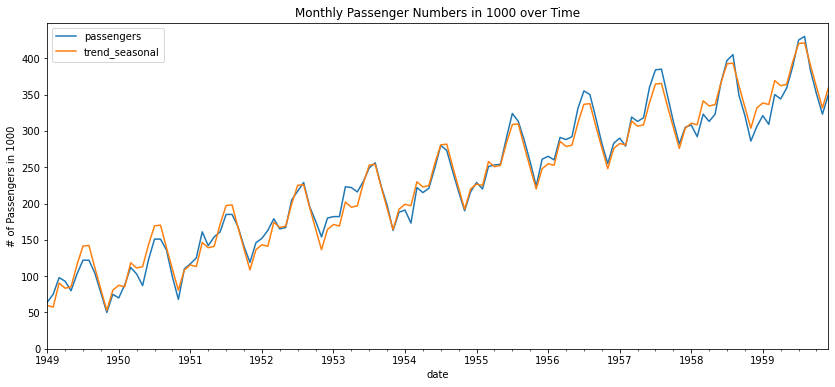

In [23]:
plot_flights(flights[['passengers', 'trend_seasonal']])

# Step 7 - Extract the remainder

In [24]:
# We want to extract the part of the model that the trend_seasonal is not able to explain
flights['remainder'] = flights['passengers'] - flights['trend_seasonal']

In [25]:
flights.head()

,passengers,year,month,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder
date,,,,,,,,,,,,,,,,,,
1949-01-01,64,1949,1,0,79.444293,0,0,0,0,0,0,0,0,0,0,0,59.594697,4.405303
1949-02-01,75,1949,2,1,81.761937,1,0,0,0,0,0,0,0,0,0,0,57.503788,17.496212
1949-03-01,98,1949,3,2,84.079581,0,1,0,0,0,0,0,0,0,0,0,90.503788,7.496212
1949-04-01,93,1949,4,3,86.397226,0,0,1,0,0,0,0,0,0,0,0,83.412879,9.587121
1949-05-01,80,1949,5,4,88.714870,0,0,0,1,0,0,0,0,0,0,0,85.231061,-5.231061


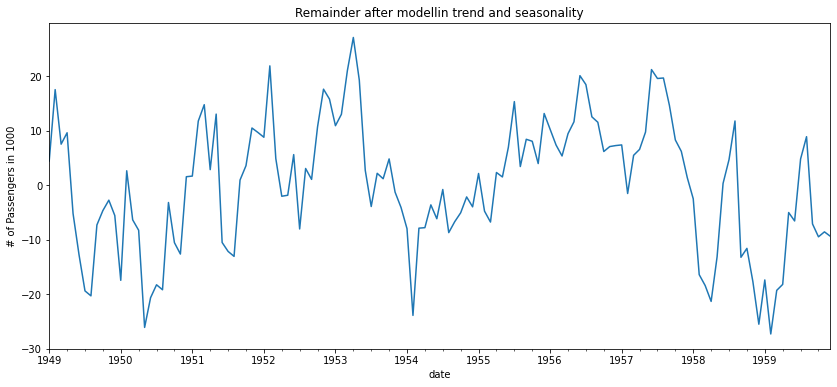

In [26]:
plot_flights(flights['remainder'], title='Remainder after modellin trend and seasonality', ylim=False)

In [27]:
# flights['remainder'].mean()

In [28]:
import numpy as np

In [29]:
random_array = np.random.normal(loc=0, scale=10, size=132)
flights['random'] = random_array

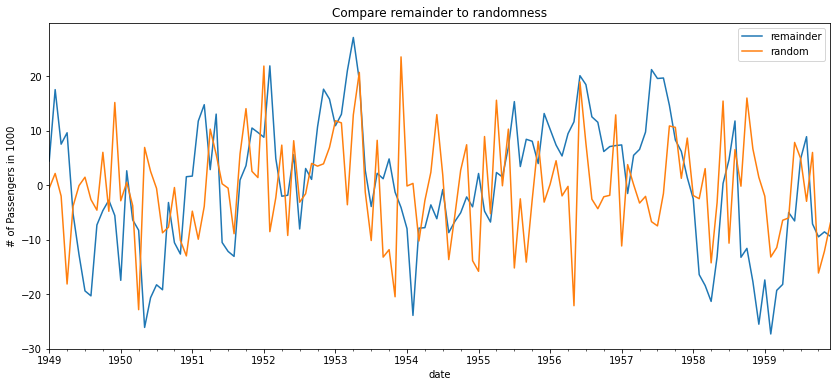

In [30]:
plot_flights(flights[['remainder', 'random']], title='Compare remainder to randomness', ylim=False)

# Step 8 - Save the remainder

In [31]:
flights['remainder'].to_csv('flights_remainder.csv')

# Tasks for the afternoon

- Finish loading, cleaning and splitting the temperature data
- Run through the same exercise for the temperature data
- Play around with a polynomial trend; it could fit your data better [m.score()]/you could look at the coefficients and determine whether they are significant

# THE REST IS FROM THE DAY AFTER

# 9) Include the lag of the remainder

In [31]:
flights['lag1'] = flights['remainder'].shift(1)
flights.dropna(inplace=True)
flights.head()

,passengers,year,month,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,random,lag1
date,,,,,,,,,,,,,,,,,,,,
1949-02-01,75,1949,2,1,81.761937,1,0,0,0,0,0,0,0,0,0,0,57.503788,17.496212,1.708439,4.405303
1949-03-01,98,1949,3,2,84.079581,0,1,0,0,0,0,0,0,0,0,0,90.503788,7.496212,0.668341,17.496212
1949-04-01,93,1949,4,3,86.397226,0,0,1,0,0,0,0,0,0,0,0,83.412879,9.587121,-9.609351,7.496212
1949-05-01,80,1949,5,4,88.714870,0,0,0,1,0,0,0,0,0,0,0,85.231061,-5.231061,-10.314194,9.587121
1949-06-01,103,1949,6,5,91.032514,0,0,0,0,1,0,0,0,0,0,0,115.776515,-12.776515,15.410475,-5.231061


In [32]:
# Assign X and y
X = flights.drop(columns=['passengers', 'year', 'month', 'trend', 'trend_seasonal', 'remainder', 'random'])
y = flights['passengers']

In [33]:
m.fit(X, y)

LinearRegression()

In [34]:
flights['final_prediction'] = m.predict(X)

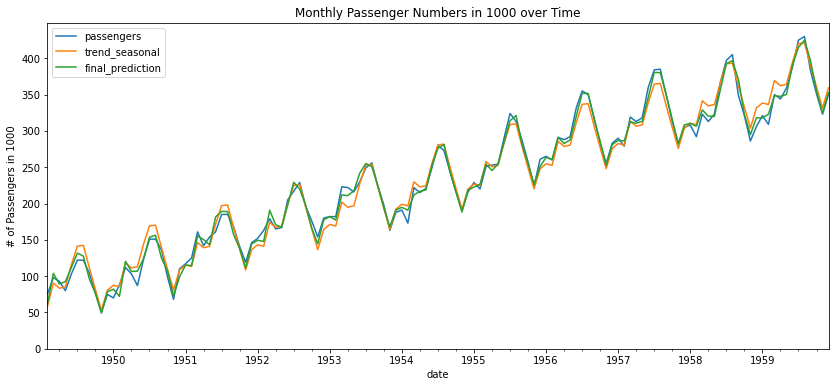

In [35]:
plot_flights(flights[['passengers', 'trend_seasonal', 'final_prediction']])